In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [ ]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lineages = 10

In [ ]:
# For each combination of islands and gene flow rate, run the GA and record the results

range_islands=np.linspace(1, 10, 10, dtype=int)
range_gene_flow_rate=np.linspace(0.1, 1, 10, dtype=float)

total_combinations = len(target_expressions) * len(range_islands) * len(range_gene_flow_rate)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for islands in range_islands:
        for gene_flow_rate in range_gene_flow_rate:
            current_combination += 1
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                islands=islands, # Dependant variable
                gene_flow_rate=gene_flow_rate, # Dependant variable
            )
            for _ in range(lineages):
                current_combination += 1

                # Time the run
                start_time = time.time()
                best_sequences, best_predictions = ga.run()
                end_time = time.time()

                # Record the results
                for sequence, prediction in zip(best_sequences, best_predictions):
                    results.append({
                        'target_expression': target_expression,
                        'islands': islands,
                        'gene_flow_rate': gene_flow_rate,
                        'error': abs(prediction - target_expression),
                        'run_time': (end_time - start_time)
                    })
            
                # Update progress bar
                progress_bar.update(1)
                elapsed_time = time.time() - initial_time
                progress_bar.set_postfix({
                    "Elapsed": format_time(elapsed_time),
                    "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
                })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/parallel_GA/island_gene_flow_results.csv', index=False)

Processing combinations:   0%|          | 0/300 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 300/300 [7:26:29<00:00, 89.30s/it, Elapsed=26789.74s, ETA=0.00s]       


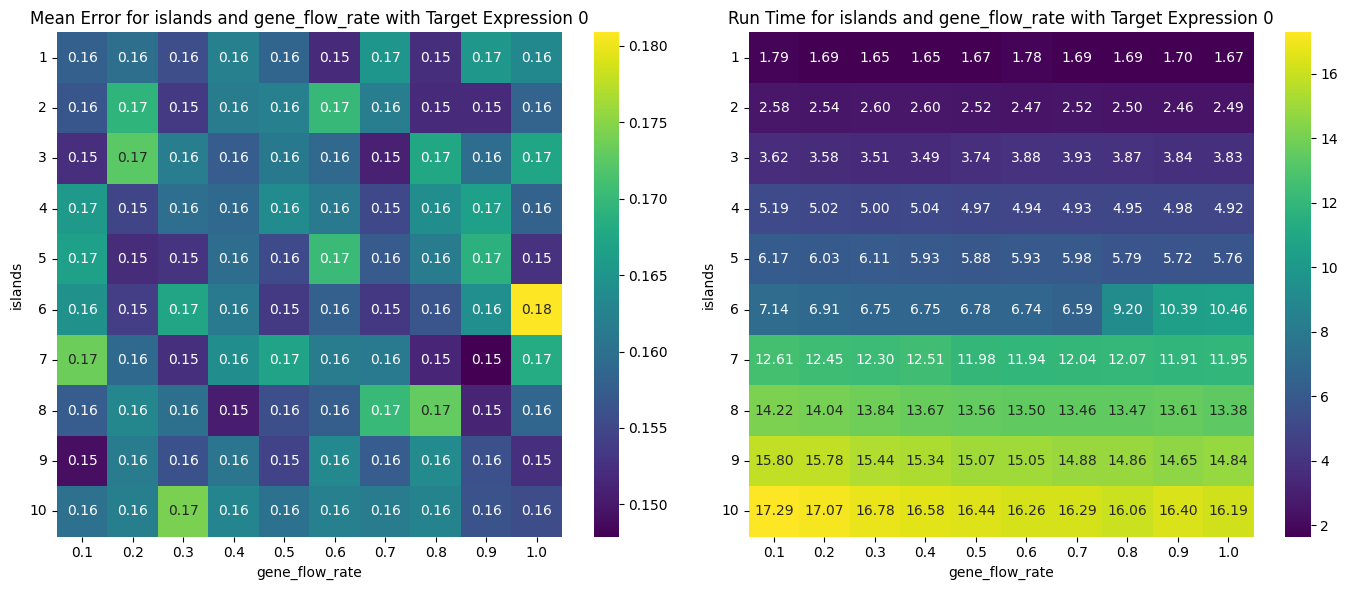

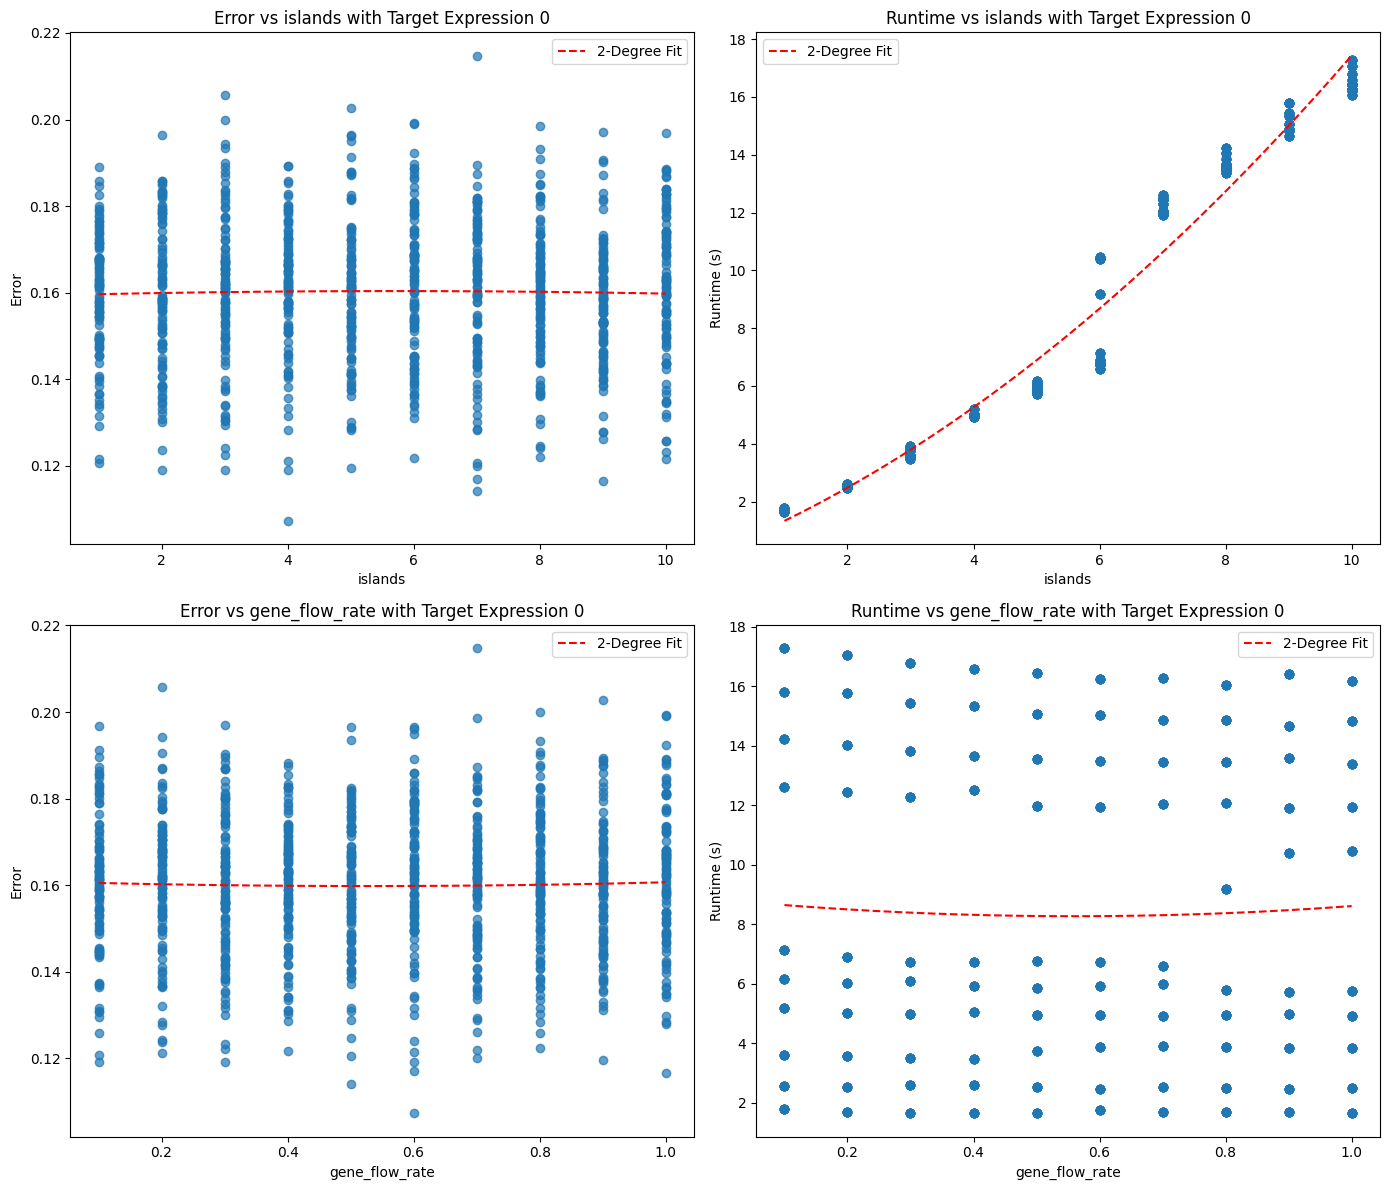

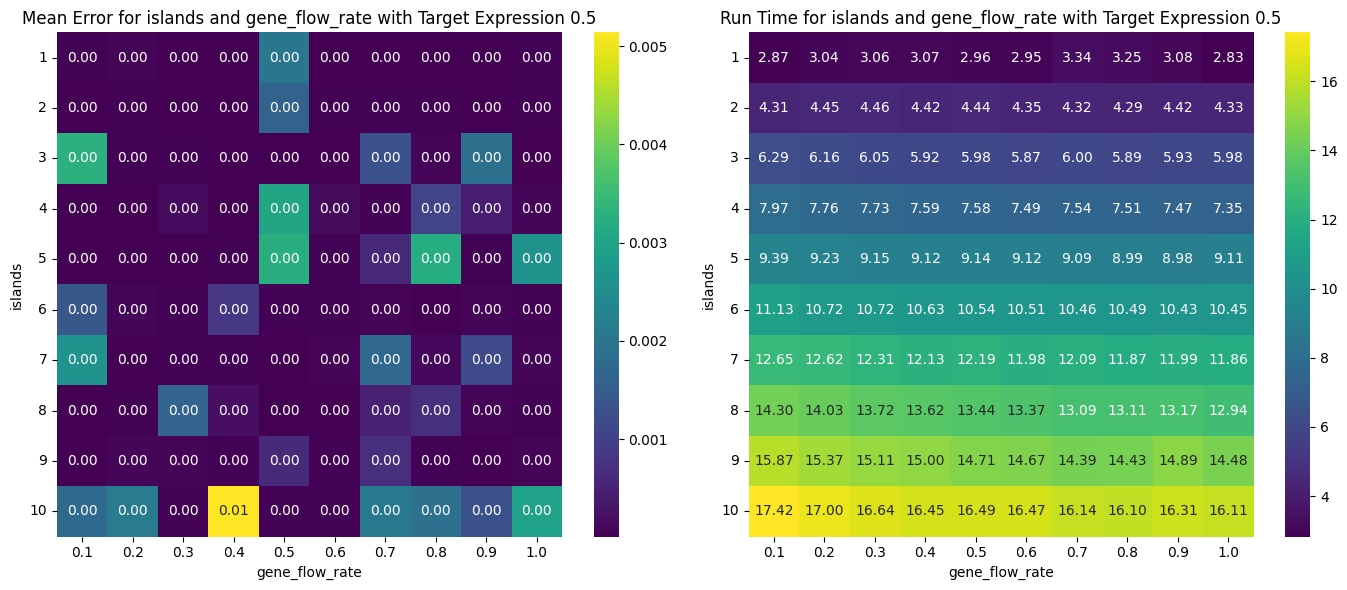

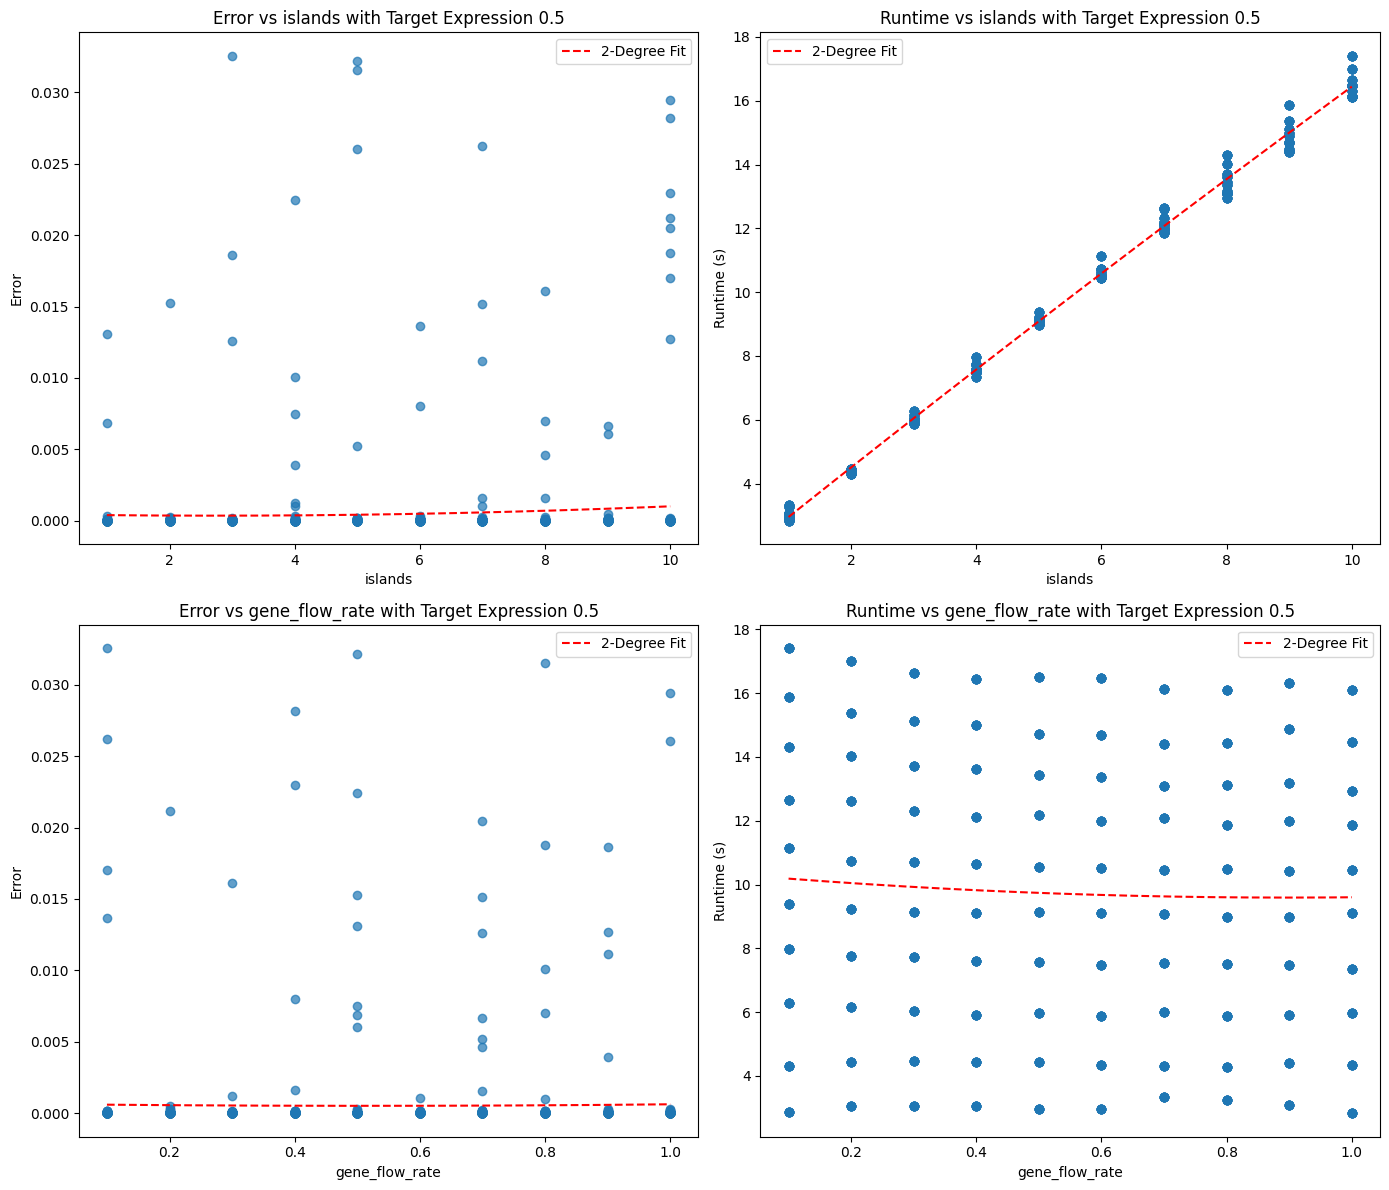

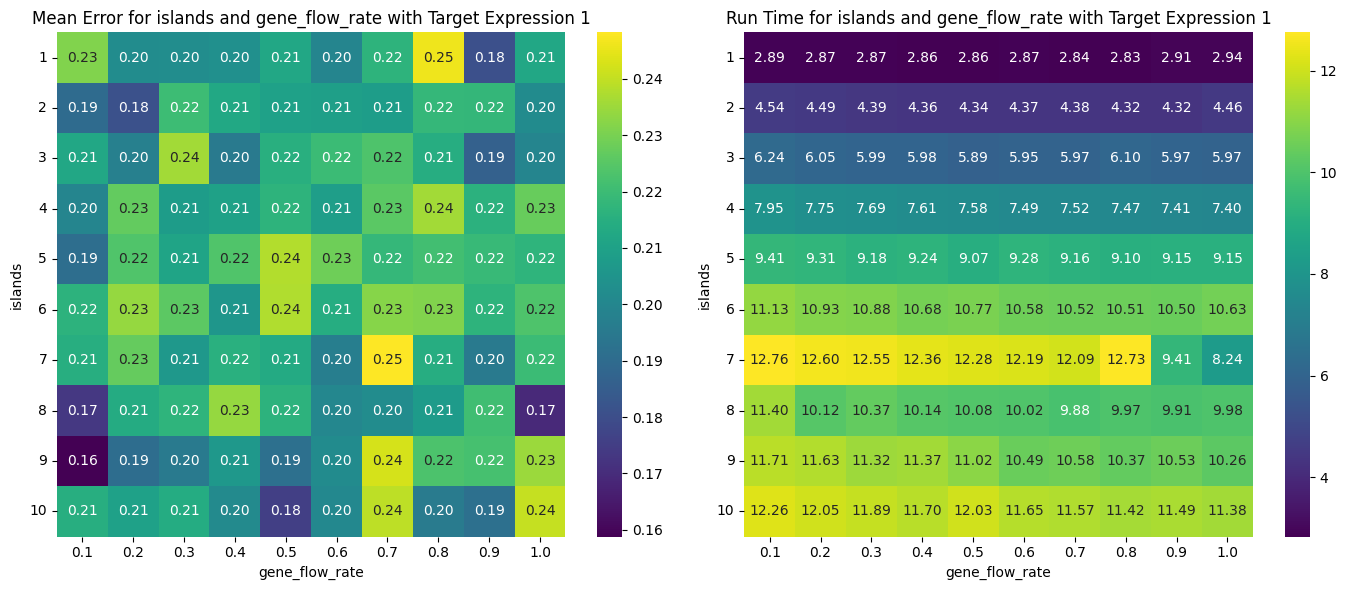

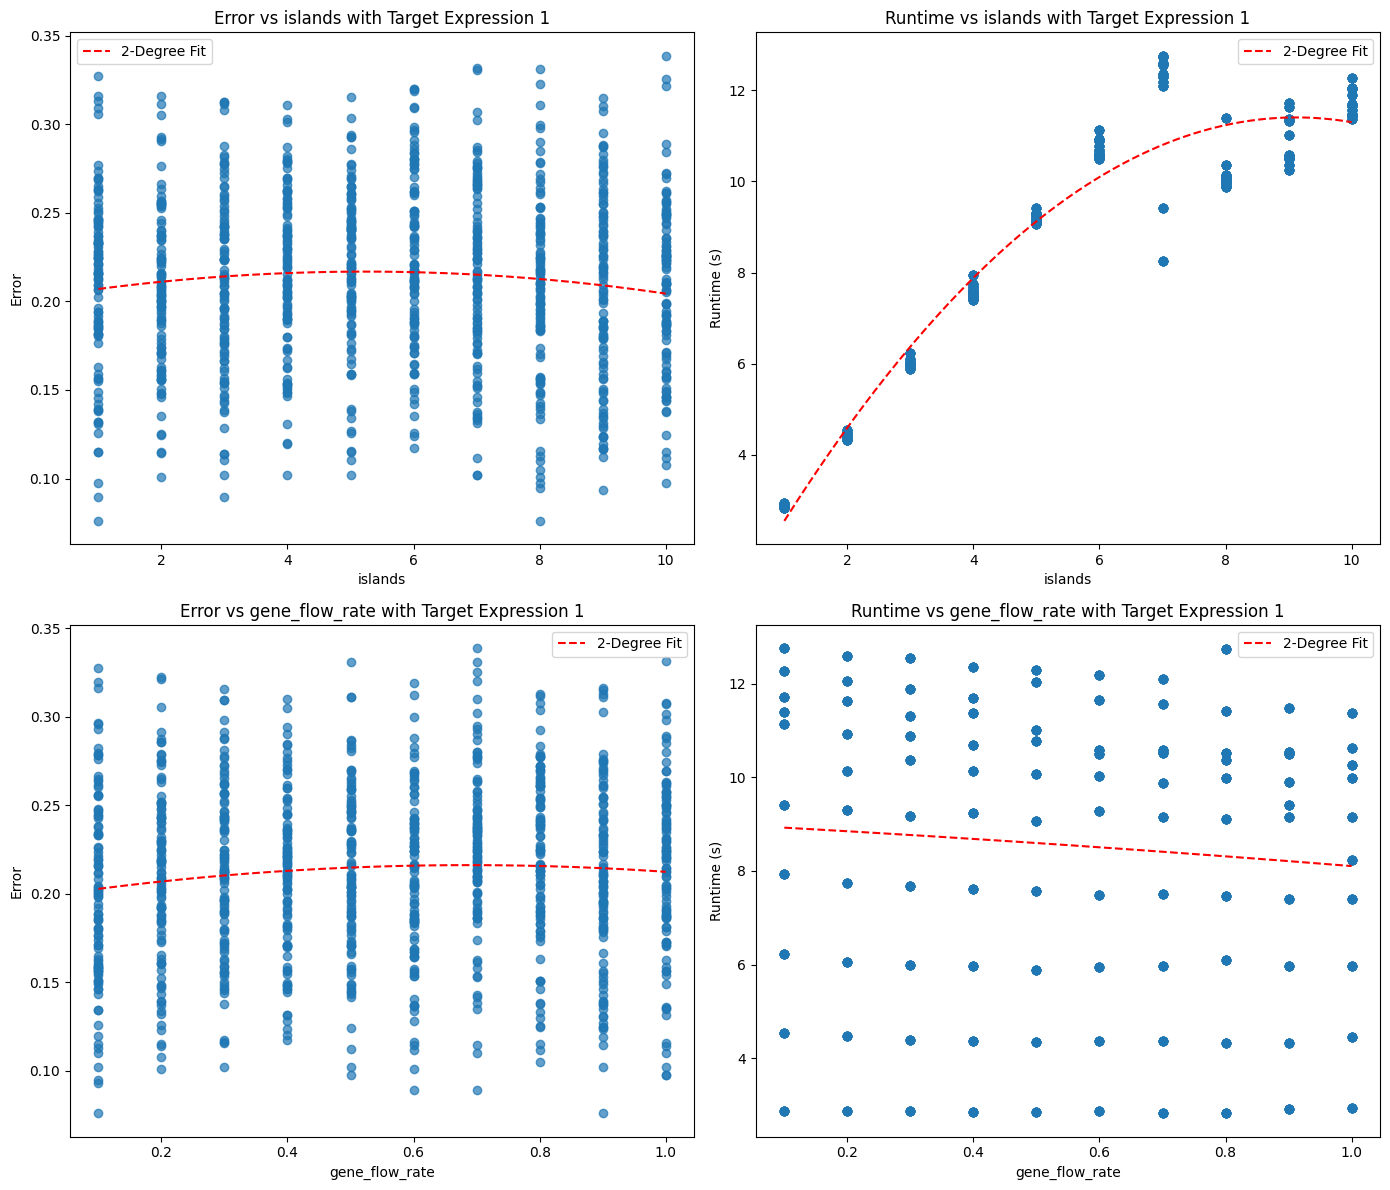

In [ ]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'islands', 'gene_flow_rate')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'islands', 'gene_flow_rate', polynomial_degree=2)